# Convolution implementation in Python

First we import the necessary modules.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Now we define the input $I$ and the two kernels $k_1$ and $k_2$

In [39]:
image1 = np.array([
    [[0], [5], [13], [9],],
    [[0], [13], [15], [10],],
    [[3], [15], [2], [0],],
    [[4], [11], [0], [1],],
], dtype=float)

image2 = np.array([
                    [[0], [0], [0], [0], [0], [0], [0], [0]],
                    [[0], [0], [5], [13], [9], [1], [0], [0]],
                    [[0], [0], [13], [15], [10], [15], [5], [0]],
                    [[0], [3], [15], [2], [0], [11], [8], [0]],
                    [[0], [4], [11], [0], [1], [12], [7], [0]],
                    [[0], [2], [14], [5], [10], [12], [0], [0]],
                    [[0], [0], [6], [13], [10], [0], [0], [0]],
                    [[0], [0], [0], [0], [0], [0], [0], [0]],
                ], dtype=float)

# ... and the two kernels
k1 = (1/16) * np.array([
    [[1], [2], [1]],
    [[2], [4], [2]],
    [[1], [2], [1]],
], dtype=float)
k2 = (1/3) * np.array([
    [[0], [1], [0]],
    [[0], [1], [0]],
    [[0], [1], [0]],
], dtype=float)

Now we come to the convolution operation:

In [40]:
def do_convolution(image, kernel, stride, padding):
    # image is pre-padded, therefore we don't have to care about the padding here
    result_dim = int((image.shape[0] - kernel.shape[0]) / stride + 1)
    result = np.zeros([result_dim, result_dim])
    for i1 in range(result_dim):
        for i2 in range(result_dim):
            sum = 0
            for ks1 in range(kernel.shape[0]):
                for ks2 in range(kernel.shape[0]):
                    sum += image[i1 + ks1,i2 + ks2] * kernel[ks1,ks2]
            result[i1, i2] = sum
    return result

Let's compute the convolutions you previously calculated by hand.

In [41]:
conv1 = do_convolution(image2, k1, 1, 0)
conv2 = do_convolution(image2, k2, 1, 0)
conv3 = do_convolution(image2, k2, 2, 0)

/tmp/ipykernel_38875/2954682396.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i1, i2] = sum


Now we plot the image $I$ and the two outputs $I * k_1$ and $I * k_2$.

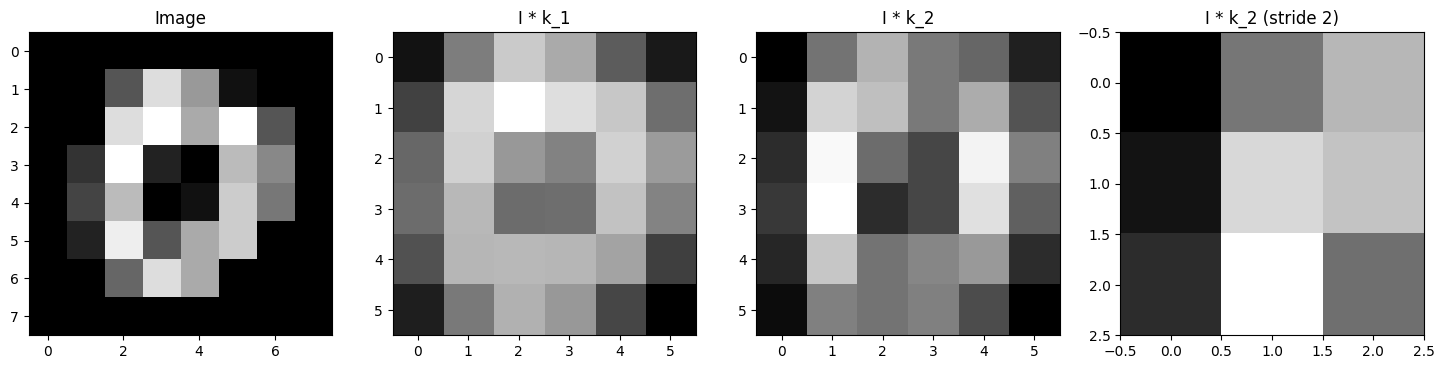

In [42]:
# Plot image and convolution output
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 16))
ax1.imshow(image2, cmap='gray')
ax1.set_title("Image")
ax2.imshow(conv1, cmap='gray')
ax2.set_title("I * k_1")
ax3.imshow(conv2, cmap='gray')
ax3.set_title("I * k_2")
ax4.imshow(conv3, cmap='gray')
ax4.set_title("I * k_2 (stride 2)")
plt.show()

The values of $k_1$ are the ones of a discrete gauss kernel and $k_2$ represents and edge detector. It is therefore no suprize that given the image on the most left side, we can see that the convolution with $k_1$ leads to a blurred version of the image. The convolution with $k_2$ indicates the two vertical edges (represented by the four white pixels). Unfortunately the convolution with $k_2$ with a stride of 2 doesn't give us an intuitive result.

Solutions of a)

In [48]:
conv1 = do_convolution(image1, k1, 1, 0)
conv2 = do_convolution(image1, k2, 1, 0)
conv1 * 16

/tmp/ipykernel_38875/2954682396.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i1, i2] = sum


array([[140., 165.],
       [137., 103.]])

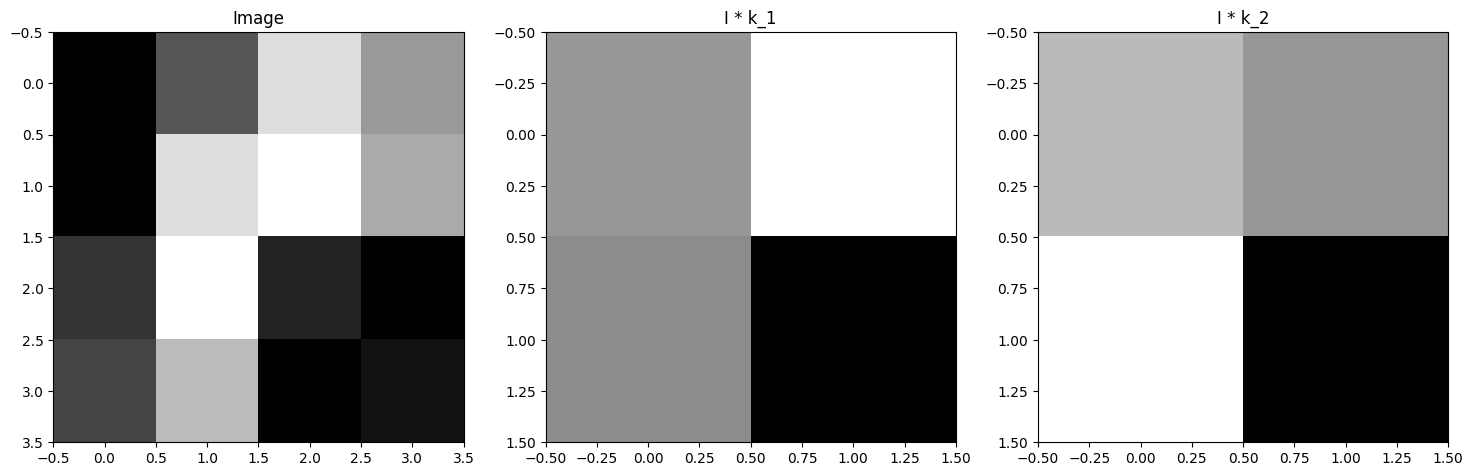

In [44]:
# Plot image and convolution output
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 16))
ax1.imshow(image1, cmap='gray')
ax1.set_title("Image")
ax2.imshow(conv1, cmap='gray')
ax2.set_title("I * k_1")
ax3.imshow(conv2, cmap='gray')
ax3.set_title("I * k_2")
plt.show()